# Prediksi Data

In [1]:
# Library dasar
import keras
# library pandas
import pandas as pd 
# library numpy
import numpy as np 
# Import library seaborn 
import seaborn as sns 
# Import library matplotlib.pyplot 
import matplotlib.pyplot as plt 
# Import train_test_split
from sklearn.model_selection import train_test_split 
# MinMaxScaler untuk normalisasi
from sklearn.preprocessing import MinMaxScaler 

# Library untuk Artificial Neural Network
# Import Library Neural Network
import tensorflow 
#Import seed numpy
from numpy.random import seed 
# Memilih data kerandoman dengan tipe seed 0
tensorflow.random.set_seed(0) 
# Import library keras
import keras 
# Import library Dense
from keras.layers import Dense 
# Import library Sequential
from keras.models import Sequential 
seed(0)

#Library evaluasi performance
# Import Library metrics
from sklearn import metrics 
# Import Library confusion_matrix
from sklearn.metrics import confusion_matrix 
# Import Library classification_report
from sklearn.metrics import classification_report 

Using TensorFlow backend.


In [2]:
# Membaca file csv untuk data test
test = pd.read_csv('Downloads/Data ID Fan BLT 2B test.csv')

In [3]:
# Mengubah format kolom Timestamp1 menjadi format datetime pandas
test['Timestamp1']=pd.to_datetime(test["Timestamp1"],infer_datetime_format=True)

# Kolom Timestamp1 dijadikan sebagai indeks
test.index=test['Timestamp1']

# Menghapus kolom Timestamp1 yang berada dalam dataframe
test=test.drop(['Timestamp1'],axis=1)

# Melihat data 5 baris pertama dari data test
test.head()

,Value1,Value2,Value3,Value4,Value5,Value6,Value7,Value8,Value9,Value10,...,Value12,Value13,Value14,Value15,Value16,Value17,Value18,Value19,Value20,Value21
Timestamp1,,,,,,,,,,,,,,,,,,,,,
2020-06-30 17:01:00,62.055229,65.147041,45.223408,21.449516,79.950203,80.359238,65.809563,65.445824,175.107559,62.721970,...,62.024860,60.539848,61.999344,59.464035,60.275501,60.379429,39.008568,42.822960,35.091797,29.170704
2020-06-30 17:02:00,62.055229,65.147041,45.250416,13.500147,65.528343,80.366974,65.809563,65.445824,175.086594,62.754013,...,62.076019,60.582470,62.093235,59.457741,60.275501,60.379429,39.005684,35.379852,35.091797,26.505449
2020-06-30 17:03:00,62.055229,65.147041,45.231834,19.929630,80.160721,80.350143,65.809563,65.445824,175.457794,62.796070,...,62.106529,60.652939,62.132458,59.535378,60.275501,60.379429,38.971634,33.562092,35.091797,41.240215
2020-06-30 17:04:00,62.055229,65.147041,45.225212,20.051809,76.175705,80.361008,65.809563,65.445824,175.087448,62.816662,...,62.146553,60.646221,62.108265,59.510113,60.275501,60.379429,38.983086,43.187466,35.091797,59.643261
2020-06-30 17:05:00,62.055229,65.147041,45.243774,13.078334,67.325798,80.363388,65.809563,65.445824,174.510696,62.827301,...,62.185387,60.764957,62.210430,59.585594,60.275501,60.379429,38.970833,32.932781,35.091797,45.313313


In [4]:
# Membuat variabel sensor yang berisi nama-nama sensor
sensor = ["Inboard Bearing Fan Temperature 1",
"Inboard Bearing Fan Temperature 2",
"Inboard Bearing Motor Temperature",
"Inboard Bearing X Axis Fan Vibration",
"Inboard Bearing Y Axis Fan Vibration",
"Inlet Control Damper Position",
"Middle Bearing Fan Temperature 1",
"Middle Bearing Fan Temperature 2",
"Motor Current",
"Motor Stator Coil U Temperature 1",
"Motor Stator Coil U Temperature 2",
"Motor Stator Coil V Temperature 1",
"Motor Stator Coil V Temperature 2",
"Motor Stator Coil W Temperature 1",
"Motor Stator Coil W Temperature 2",
"Outboard Bearing Fan Temperature 1",
"Outboard Bearing Fan Temperature 2",
"Outboard Bearing Motor Temperature",
"Outboard Bearing X Axis Fan Vibration",
"Outboard Bearing Y Axis Fan Vibration",
"Outlet Pressure"]

In [5]:
# Mengganti nama kolom Value(n) menjadi nama sensor
test = test[['Value1','Value2', 'Value3', 'Value4', 'Value5', 'Value6','Value7','Value8','Value9','Value10','Value11','Value12','Value13','Value14','Value15','Value16','Value17','Value18','Value19',
            'Value20','Value21']]
test.columns = sensor
test.dtypes

Inboard Bearing Fan Temperature 1        float64
Inboard Bearing Fan Temperature 2        float64
Inboard Bearing Motor Temperature        float64
Inboard Bearing X Axis Fan Vibration     float64
Inboard Bearing Y Axis Fan Vibration     float64
Inlet Control Damper Position            float64
Middle Bearing Fan Temperature 1         float64
Middle Bearing Fan Temperature 2         float64
Motor Current                            float64
Motor Stator Coil U Temperature 1        float64
Motor Stator Coil U Temperature 2        float64
Motor Stator Coil V Temperature 1        float64
Motor Stator Coil V Temperature 2        float64
Motor Stator Coil W Temperature 1        float64
Motor Stator Coil W Temperature 2        float64
Outboard Bearing Fan Temperature 1       float64
Outboard Bearing Fan Temperature 2       float64
Outboard Bearing Motor Temperature       float64
Outboard Bearing X Axis Fan Vibration    float64
Outboard Bearing Y Axis Fan Vibration    float64
Outlet Pressure     

In [6]:
# Mengubah data test menjadi numerik (float)
test = test.apply(pd.to_numeric, errors='coerce')
test.dtypes

Inboard Bearing Fan Temperature 1        float64
Inboard Bearing Fan Temperature 2        float64
Inboard Bearing Motor Temperature        float64
Inboard Bearing X Axis Fan Vibration     float64
Inboard Bearing Y Axis Fan Vibration     float64
Inlet Control Damper Position            float64
Middle Bearing Fan Temperature 1         float64
Middle Bearing Fan Temperature 2         float64
Motor Current                            float64
Motor Stator Coil U Temperature 1        float64
Motor Stator Coil U Temperature 2        float64
Motor Stator Coil V Temperature 1        float64
Motor Stator Coil V Temperature 2        float64
Motor Stator Coil W Temperature 1        float64
Motor Stator Coil W Temperature 2        float64
Outboard Bearing Fan Temperature 1       float64
Outboard Bearing Fan Temperature 2       float64
Outboard Bearing Motor Temperature       float64
Outboard Bearing X Axis Fan Vibration    float64
Outboard Bearing Y Axis Fan Vibration    float64
Outlet Pressure     

In [7]:
# Drop kolom pada data test yang tidak perlu digunakan
test=test.drop(['Inlet Control Damper Position','Motor Stator Coil U Temperature 1','Motor Stator Coil U Temperature 2','Motor Stator Coil V Temperature 1','Motor Stator Coil V Temperature 2','Motor Stator Coil W Temperature 1','Motor Stator Coil W Temperature 2','Outlet Pressure'],axis=1)

In [8]:
# Drop kolom pada data test yang tidak perlu digunakan
test=test.drop(['Inboard Bearing Fan Temperature 2','Middle Bearing Fan Temperature 2','Outboard Bearing Fan Temperature 2'],axis=1)

In [9]:
# Drop kolom pada data test yang tidak perlu digunakan
test=test.drop(['Middle Bearing Fan Temperature 1','Inboard Bearing Y Axis Fan Vibration'],axis=1)

In [10]:
# Melihat lima baris pertama data test
test.head()

,Inboard Bearing Fan Temperature 1,Inboard Bearing Motor Temperature,Inboard Bearing X Axis Fan Vibration,Motor Current,Outboard Bearing Fan Temperature 1,Outboard Bearing Motor Temperature,Outboard Bearing X Axis Fan Vibration,Outboard Bearing Y Axis Fan Vibration
Timestamp1,,,,,,,,
2020-06-30 17:01:00,62.055229,45.223408,21.449516,175.107559,60.275501,39.008568,42.822960,35.091797
2020-06-30 17:02:00,62.055229,45.250416,13.500147,175.086594,60.275501,39.005684,35.379852,35.091797
2020-06-30 17:03:00,62.055229,45.231834,19.929630,175.457794,60.275501,38.971634,33.562092,35.091797
2020-06-30 17:04:00,62.055229,45.225212,20.051809,175.087448,60.275501,38.983086,43.187466,35.091797
2020-06-30 17:05:00,62.055229,45.243774,13.078334,174.510696,60.275501,38.970833,32.932781,35.091797


In [11]:
# Menghilangkan data yang bernilai NaN pada data test
test=test.dropna()

numpy.ndarray

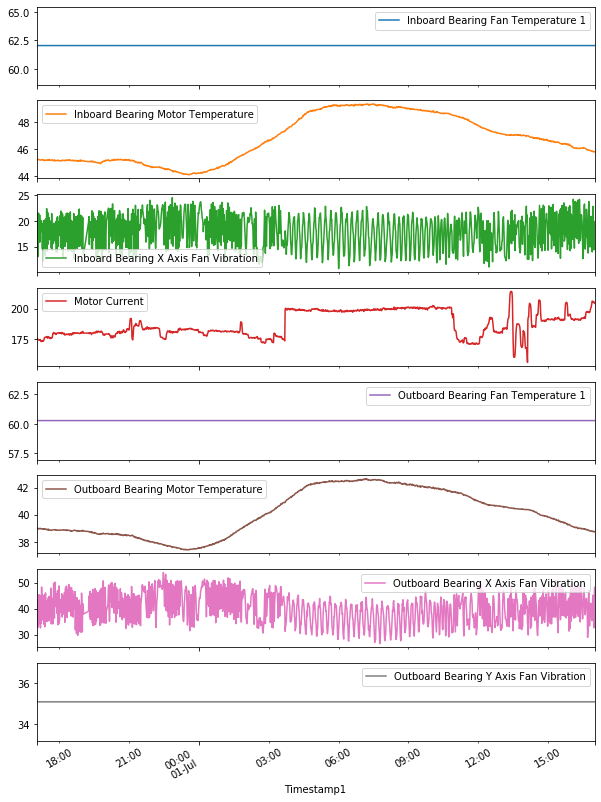

In [12]:
# Plotting data test
axes = test.plot.line(subplots=True,figsize=(10,15))
type(axes)

In [13]:
# Memilih size window untuk rolling mean
ws=5

# Rolling mean untuk menghaluskan fluktuasi jangka pendek data
test = test.rolling(5, min_periods=1).mean()

# Melihat lima baris pertama data test
test.head()

,Inboard Bearing Fan Temperature 1,Inboard Bearing Motor Temperature,Inboard Bearing X Axis Fan Vibration,Motor Current,Outboard Bearing Fan Temperature 1,Outboard Bearing Motor Temperature,Outboard Bearing X Axis Fan Vibration,Outboard Bearing Y Axis Fan Vibration
Timestamp1,,,,,,,,
2020-06-30 17:01:00,62.055229,45.223408,21.449516,175.107559,60.275501,39.008568,42.822960,35.091797
2020-06-30 17:02:00,62.055229,45.236912,17.474832,175.097076,60.275501,39.007126,39.101406,35.091797
2020-06-30 17:03:00,62.055229,45.235219,18.293098,175.217316,60.275501,38.995295,37.254968,35.091797
2020-06-30 17:04:00,62.055229,45.232718,18.732776,175.184849,60.275501,38.992243,38.738092,35.091797
2020-06-30 17:05:00,62.055229,45.234929,17.601887,175.050018,60.275501,38.987961,37.577030,35.091797


In [14]:
# Menormalisasikan nilai X_test menggunakan metode MinMaxScaler
from pickle import load
sc = load(open('scaler2B.pkl', 'rb'))
X_test = sc.transform(test)

In [15]:
# Loading model
loaded_model = keras.models.load_model('ID_2B_BLT_model.h5')

In [16]:
# Memprediksi y_test menggunakan model yang telah dibuat
y_pred = loaded_model.predict(X_test)
# Membuat data y_pred menjadi data biner dan menyimpannya ke dalam variabel y_final
y_final = (y_pred > 0.5).astype(int).reshape(test.shape[0])

# Membuat y_pred dalam bentuk DataFrame
y_pred=pd.DataFrame(y_pred)

# Menghitung value dari y_pred (nilai continuous)
y_pred.apply(pd.value_counts)

,0
0.000000e+00,5
8.094586e-35,2
5.052559e-32,1
3.553203e-29,1
5.418372e-32,1
...,...
9.439270e-34,1
7.869374e-34,1
4.828247e-27,1
4.802364e-35,1


In [17]:
# Membuat y_final dalam bentuk DataFrame
y_final = pd.DataFrame(y_final)
# Ubah nama kolom
y_final.columns = ['Prediksi']
# Menghitung value dari y_final
y_final.apply(pd.value_counts)

,Prediksi
0,1440


In [18]:
# Mensetting index prediksi = index test
y_final.index = test.index
y_final

,Prediksi
Timestamp1,
2020-06-30 17:01:00,0
2020-06-30 17:02:00,0
2020-06-30 17:03:00,0
2020-06-30 17:04:00,0
2020-06-30 17:05:00,0
...,...
2020-07-01 16:56:00,0
2020-07-01 16:57:00,0
2020-07-01 16:58:00,0


In [19]:
# Menggabungkan data test dan y_final
pred = pd.merge(test,y_final,how='outer',on='Timestamp1')

numpy.ndarray

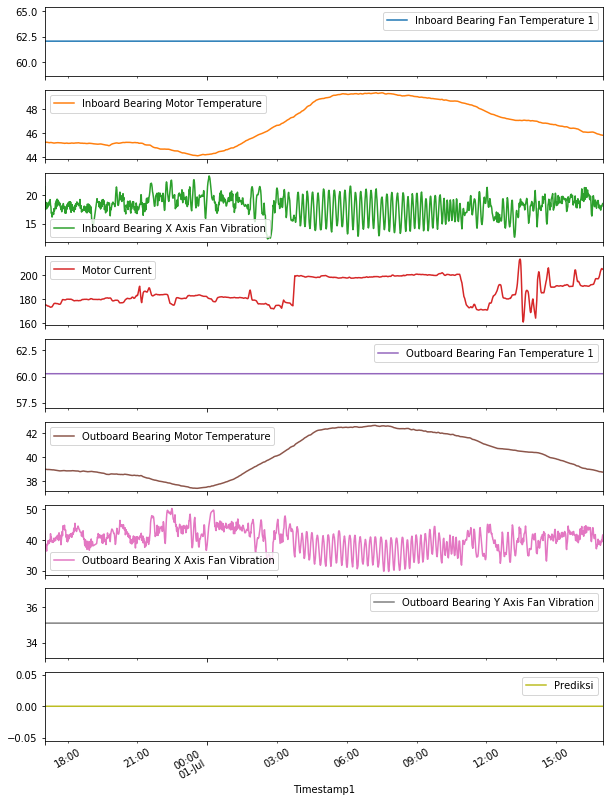

In [20]:
# Plotting data pred
axes = pred.plot.line(subplots=True,figsize=(10,15))
type(axes)

In [21]:
# Mensetting mode display scrollbar
pd.set_option("display.max_rows", None)

In [22]:
# Melihat data pred
pred

,Inboard Bearing Fan Temperature 1,Inboard Bearing Motor Temperature,Inboard Bearing X Axis Fan Vibration,Motor Current,Outboard Bearing Fan Temperature 1,Outboard Bearing Motor Temperature,Outboard Bearing X Axis Fan Vibration,Outboard Bearing Y Axis Fan Vibration,Prediksi
Timestamp1,,,,,,,,,
2020-06-30 17:01:00,62.055229,45.223408,21.449516,175.107559,60.275501,39.008568,42.822960,35.091797,0
2020-06-30 17:02:00,62.055229,45.236912,17.474832,175.097076,60.275501,39.007126,39.101406,35.091797,0
2020-06-30 17:03:00,62.055229,45.235219,18.293098,175.217316,60.275501,38.995295,37.254968,35.091797,0
2020-06-30 17:04:00,62.055229,45.232718,18.732776,175.184849,60.275501,38.992243,38.738092,35.091797,0
2020-06-30 17:05:00,62.055229,45.234929,17.601887,175.050018,60.275501,38.987961,37.577030,35.091797,0
2020-06-30 17:06:00,62.055229,45.232636,17.619505,174.884534,60.275501,38.984965,36.400222,35.091797,0
2020-06-30 17:07:00,62.055229,45.226472,18.619560,174.701184,60.275501,38.977879,38.396976,35.091797,0
2020-06-30 17:08:00,62.055229,45.223669,17.799782,174.395560,60.275501,38.975513,38.528288,35.091797,0
2020-06-30 17:09:00,62.055229,45.219743,18.018027,174.254074,60.275501,38.972848,38.496329,35.091797,0
